# Session analysis

In [1]:
import pandas as pd

import sys
 
# setting path
sys.path.append('..')

from mna.sessions.eye_session import process_session_eye
from mna.sessions.eeg_session import process_session_eeg
from mna.sessions.motor_session import process_session_motor
from mna.sessions.ecg_session import process_session_ecg

In [2]:
import matplotlib
matplotlib.use('Agg')

# 1. Read a RN App, converted pkl file, and create the metadata and data structure

In [3]:
from os import listdir
from os.path import isfile, join
from mna.utils.rnapp_data_format import read_all_lslpresets, return_metadata_from_name, event_data_from_data
import pickle

In [4]:
data_dir = "../data/"
lsl_dir = "../mna/LSLPresets/"
onlyfiles = [f for f in listdir(data_dir) if isfile(join(data_dir, f)) and '.pkl' in f]
input_path = data_dir + onlyfiles[26] # pick a random file, idx 26 and 

print(f"input_path {input_path}")
metadata_jsons = read_all_lslpresets(path_to_jsonfiles=lsl_dir)
with open(input_path, 'rb') as handle:
    rns_data = pickle.load(handle)
    
## Add metadata to data

for key in rns_data.keys():
    rns_data[key].append(return_metadata_from_name(key, metadata_jsons))

input_path ../data/09_09_2022_11_52_19-Exp_adadrive-Sbj_13-Ssn_1.dats.pkl


# 2. Create new events (trial start etc.)

In [5]:
event_df = event_data_from_data(rns_data, interrupted_id_sessions=[(13,1), (22,1)])
event_df['trial_damage'] = event_df.damage.diff().fillna(0)
event_df['trial_duration'] = event_df.trial_end_time - event_df.trial_start_time
percent_missing = event_df.notnull().sum() / len(event_df)
summary_statistics = {}
summary_statistics['voice_success_rate'] = percent_missing['voice_timestamp']
if 'chunk_timestamp' in percent_missing:
    summary_statistics['chunk_success_rate'] = percent_missing['chunk_timestamp']
else:
    summary_statistics['chunk_success_rate'] = 0

# temporary fix for pilot phase where we had some incomplete data
if 'block_condition' not in event_df:
    event_df['block_condition'] = 'practice'
    event_df.loc[5:,'block_condition'] = 'voice'

event_df['spoken_difficulty_encoded'] = event_df.spoken_difficulty.replace(to_replace=['easy', 'hard', 'unknown'],
                                                                      value=[1, 2, None])

FIXING THE EVENT DF SINCE PID 13.0 SESSION 1.0 WAS INTERRUPTED


# Pupil work (for 11/08)

In [8]:
calib_densities = [0, 0, 0.3, 0.5, 0.7, 0.8, 0.8, 0.7, 0.5, 0.3, 0] # sequence of densities, the first we drop
calib_trial_duration = 5 # seconds
calib_blocks = [2, 12] # 1st block is practice, second is calib, and 12th is second calib (not all sessions reached here)
print('calib_densities',len(calib_densities), 'total expected duratino', len(calib_densities)*calib_trial_duration)
event_df

calib_densities 11 total expected duratino 55


,trial_start_time,trial_end_time,ppid,session,block,number_in_block,trial,density,damage,source,destination,chunk_timestamp,chunk,block_condition,spoken_difficulty,voice_timestamp,trial_damage,trial_duration,spoken_difficulty_encoded
0,0.000000,84230.571321,13.0,1.0,1.0,1.0,1.0,0.000000,0.000000,4.0,46.0,84230.571939,South to North,practice,unknown,84227.518569,0.000000,84230.571321,NaN
1,84230.581321,84297.157811,13.0,1.0,1.0,2.0,2.0,0.100000,5.766666,4.0,46.0,84297.157820,South to North,practice,unknown,84294.486048,5.766666,66.576490,NaN
2,84297.167811,84321.093998,13.0,1.0,1.0,3.0,3.0,0.300000,18.907904,4.0,46.0,84321.093904,South to West,practice,unknown,84319.406884,13.141237,23.926187,NaN
3,84321.103998,84343.310596,13.0,1.0,1.0,4.0,4.0,0.500000,30.488705,4.0,46.0,84343.310483,East to North,practice,hard,84341.997827,11.580801,22.206598,2.0
4,84343.320596,84422.078426,13.0,1.0,1.0,5.0,5.0,0.700000,42.924377,4.0,46.0,84422.078313,South to East,practice,unknown,84356.016807,12.435673,78.757830,NaN
5,84422.088426,84564.667816,13.0,1.0,3.0,1.0,17.0,0.766825,52.304337,2.0,32.0,84564.667709,South to North,voice,unknown,84523.965818,9.379959,142.579389,NaN
6,84564.677816,84649.597523,13.0,1.0,3.0,2.0,18.0,0.026853,52.304337,2.0,32.0,84649.597424,South to East,voice,NaN,NaN,0.000000,84.919707,NaN
7,84649.607523,84703.261416,13.0,1.0,3.0,3.0,19.0,0.351018,56.485657,2.0,32.0,84703.261328,West to North,voice,hard,84698.187841,4.181320,53.653894,2.0
8,84703.271416,84739.766443,13.0,1.0,3.0,4.0,20.0,0.359224,92.754387,2.0,32.0,84739.766361,South to East,voice,NaN,NaN,36.268730,36.495027,NaN
9,84739.776443,84765.375890,13.0,1.0,3.0,5.0,21.0,0.108578,92.754387,2.0,32.0,84765.375815,West to North,voice,NaN,NaN,0.000000,25.599448,NaN


In [65]:
import scipy
import matplotlib.pyplot as plt
def pupil_diameter_evoked(eyetracking_df, event_df, fs, pupil, plot_evoked_pupil = False):
    
    time = np.arange(0, 3, 1/fs)
    trial_onset = event_df['trial_start_time']
    baseline_samples = int(fs*0.2)
    onset_3sec_samples = int(fs*3)
    
    baseline_pupil = np.empty(len(trial_onset.index))
    onset_3sec_pupil = np.empty([len(trial_onset.index),onset_3sec_samples])

    for i in event_df.index:
        
        # filter first trial and trial exceed available eyetracking timestamp
        if (trial_onset[i] == 0) or (trial_onset[i] > max(eyetracking_df.timestamp)): 
            baseline_pupil[i] = float("NaN")
            onset_3sec_pupil[i,:] = float("NaN")
        else:
            trial_baseline_pupil = eyetracking_df[pupil][(eyetracking_df.timestamp >= trial_onset[i]-.2) & 
                                                         (eyetracking_df.timestamp < trial_onset[i])].replace(-1, np.nan)
            
            trial_onset_3sec_pupil = eyetracking_df[pupil][(eyetracking_df.timestamp >= trial_onset[i]) & 
                                                        (eyetracking_df.timestamp < trial_onset[i]+3)].replace(-1, np.nan)
            
            # fill in missing values through interpolation
            trial_baseline_pupil = trial_baseline_pupil.interpolate(method ='linear', 
                                                                    limit_direction ='forward')
            trial_onset_3sec_pupil = trial_onset_3sec_pupil.interpolate(method ='linear', 
                                                                        limit_direction ='forward')

            # keep all trial dimension consistent through linear interpolation (due to inconsistent sample rate)
            if len(trial_baseline_pupil) != baseline_samples:
                baseline_interp = scipy.interpolate.interp1d(np.arange(trial_baseline_pupil.size),
                                                             trial_baseline_pupil)
                trial_baseline_pupil_interp = baseline_interp(np.linspace(0, trial_baseline_pupil.size-1, baseline_samples))
            else: 
                trial_baseline_pupil_interp = trial_baseline_pupil

            if len(trial_onset_3sec_pupil) != onset_3sec_samples:
                onset_3sec_pupil_interp = scipy.interpolate.interp1d(np.arange(trial_onset_3sec_pupil.size),
                                                                     trial_onset_3sec_pupil)
                trial_onset_3sec_pupil_interp = onset_3sec_pupil_interp(np.linspace(0, trial_onset_3sec_pupil.size-1, onset_3sec_samples))
            else: 
                trial_onset_3sec_pupil_interp = trial_onset_3sec_pupil

            # invalidate trials with more than half invalid samples
            if (np.isnan(trial_baseline_pupil_interp).sum() >= int(baseline_samples*.5) or 
                np.isnan(trial_onset_3sec_pupil_interp).sum() >= int(onset_3sec_samples*.5)):
                baseline_pupil[i] = float("NaN")
            else:
                baseline_pupil[i] = trial_baseline_pupil_interp.mean()
        
            # baseline correction
            onset_3sec_pupil[i,:] = trial_onset_3sec_pupil_interp - baseline_pupil[i]
    
    # evoked pupil diameter
    evoked_pupil_diameter = np.mean(onset_3sec_pupil, axis = 1)
    
    # plot easy and hard trials - averaged
    valid_baseline_trials = onset_3sec_pupil[~np.isnan(baseline_pupil)]
    easy_trials = onset_3sec_pupil[event_df['spoken_difficulty']=='easy']
    hard_trials = onset_3sec_pupil[event_df['spoken_difficulty']=='hard']

    def plot_evoked_trials(trials, line_color, fill_color, trial_label):
        trials_mean = np.nanmean(trials, axis = 0)
        trials_std = np.nanstd(trials, axis = 0)

        under_line = trials_mean - trials_std
        over_line = trials_mean + trials_std

        plt.plot(time, trials_mean, line_color, label = trial_label)
        plt.fill_between(time, under_line, over_line, color=fill_color, alpha=.1)
        plt.legend()
        
    if plot_evoked_pupil:
        plot_evoked_trials(easy_trials, 'r-', 'r', 'Easy')
        plot_evoked_trials(hard_trials, 'k-', 'k', 'Hard')
    
    return evoked_pupil_diameter

array([        nan, -1.24790183, -1.53436182, -0.16267853,  0.24547005,
        0.02837894,         nan,  0.836855  , -0.19888649,  0.00177371,
        0.74041409, -0.25094999,  0.001667  , -0.28322517,  0.2327727 ,
       -0.21846169,  0.14441732,  0.38174884,  0.33564826,  0.03323318,
       -0.52951355, -0.43459176,  0.07505023,  0.00448568, -0.23360747,
       -1.15899709,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])

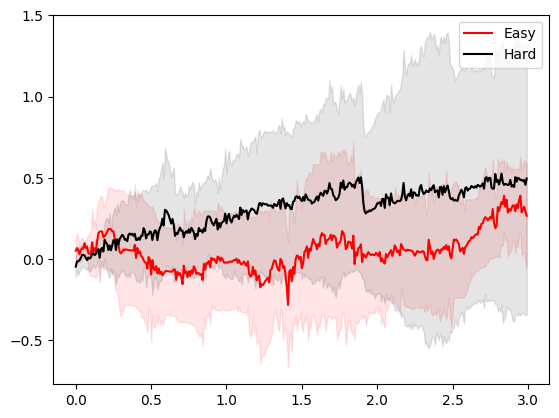

In [66]:
%matplotlib inline

eye_channel = 'Unity_ViveSREyeTracking'
pupil_diameter_evoked(eyetracking_df, event_df, rns_data[eye_channel][2]['NominalSamplingRate'], pupil,plot_evoked_pupil=True)

In [43]:
import numpy as np

df = pd.DataFrame(rns_data['Unity_ViveSREyeTracking'][0], columns=rns_data['Unity_ViveSREyeTracking'][1],
                      index=rns_data['Unity_ViveSREyeTracking'][2]['ChannelNames']).T
eyetracking_df = df.reset_index().rename(columns={'index': 'timestamp'})

calib_block = 3
pupil = 'L Pupil Diameter'
calib_block_onset = float(event_df.trial_start_time[(event_df.block==calib_block) & (event_df.number_in_block==1)])
calib_block_offset = float(event_df.trial_end_time[(event_df.block==calib_block) & (event_df.number_in_block==1)])
trial_baseline_pupil = eyetracking_df[(eyetracking_df.timestamp >= calib_block_onset) & 
                                                         (eyetracking_df.timestamp < calib_block_offset)].replace(-1, np.nan)


<AxesSubplot:xlabel='timestamp'>

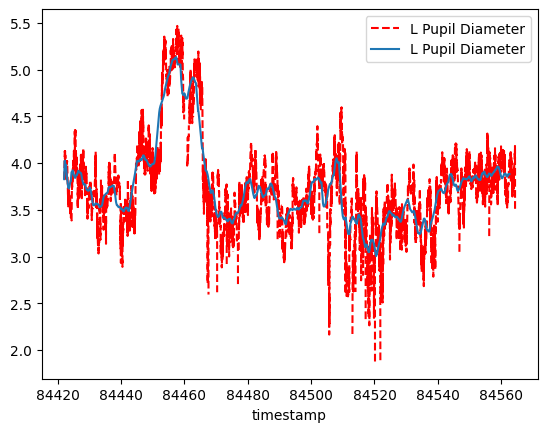

In [57]:
%matplotlib inline

ax = trial_baseline_pupil.plot(x='timestamp',y=pupil, style = 'r--', label = pupil)
trial_baseline_pupil.ewm(span = 500).mean().plot(x='timestamp',y=pupil, ax=ax)

# 3. ECG Data Processing

In [7]:
post_processed_event_df = process_session_ecg(rns_data, event_df,plot_frequency=20,plot_ecg_snippet=40)

# 4. Eye Tracking Processing

In [ ]:
post_processed_event_df = process_session_eye(rns_data, post_processed_event_df,detect_blink=True,plot_frequency=20, plot_eye_snippet=40)

# 5. EEG

In [ ]:
post_processed_event_df, epochs, events, event_dict, info, reject_log, ica = process_session_eeg(rns_data, post_processed_event_df,
                                                                    event_column='spoken_difficulty_encoded', run_autoreject=True, run_ica=True)

# 5. Motor

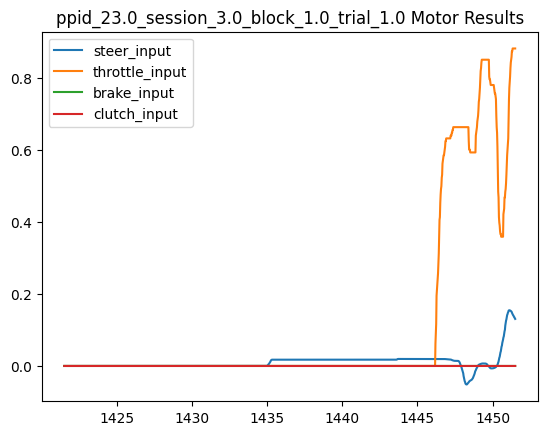

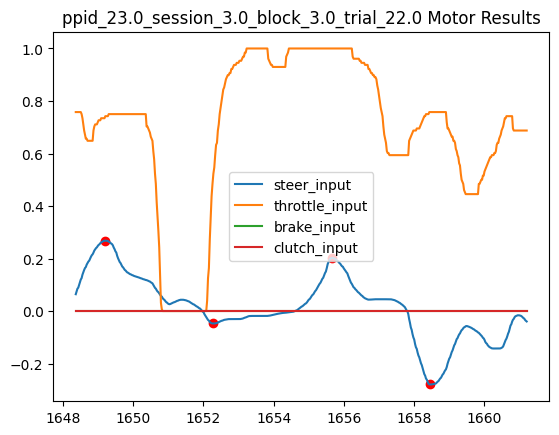

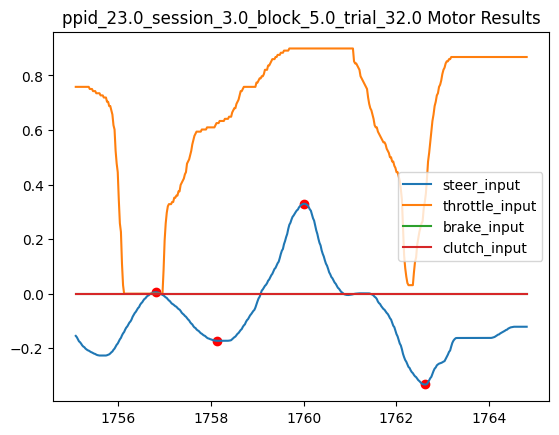

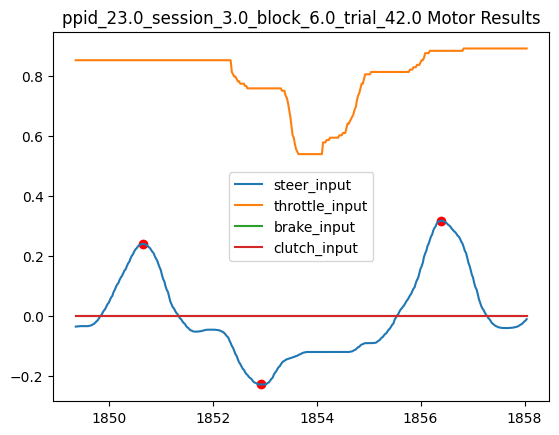

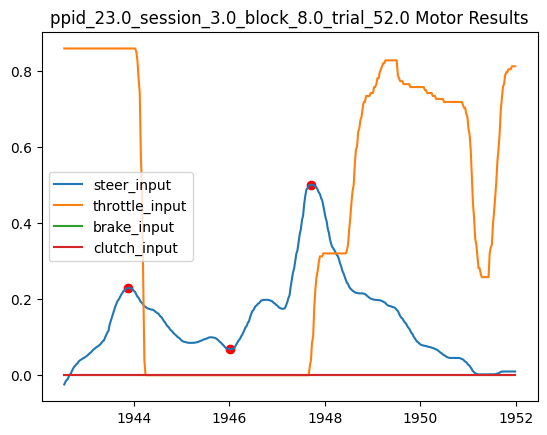

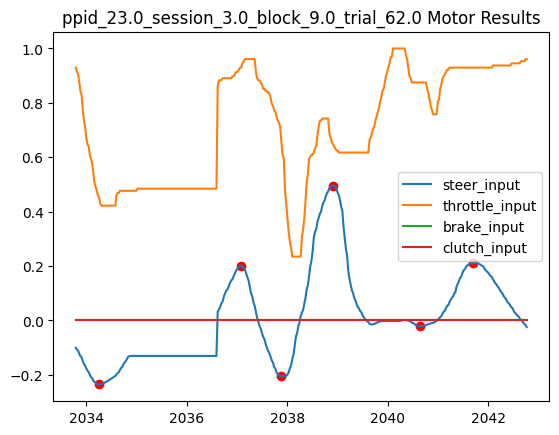

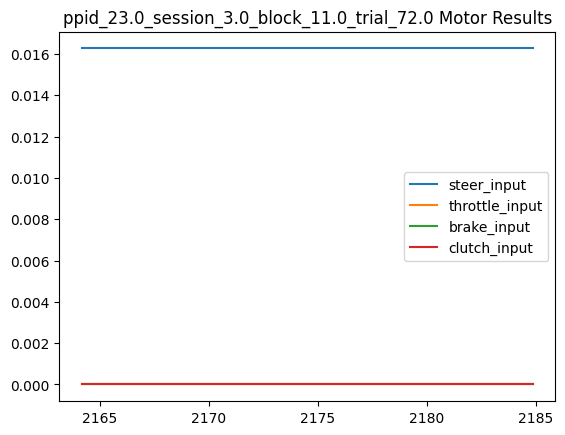

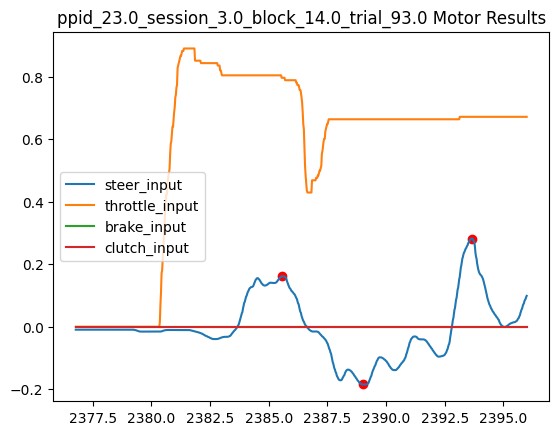

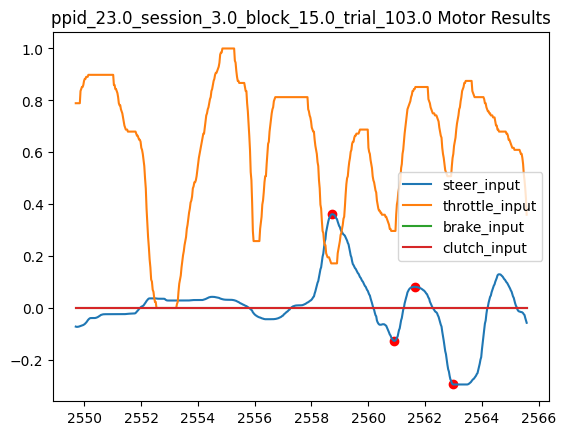

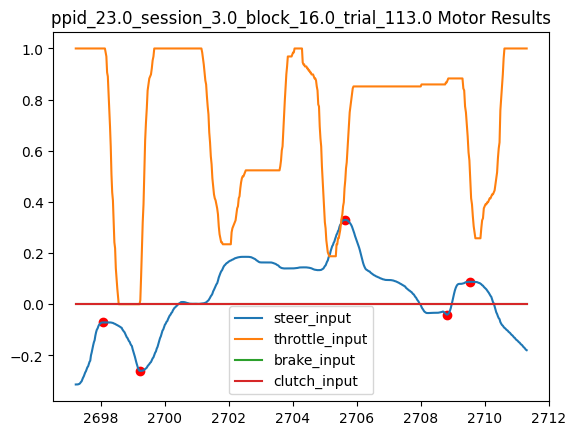

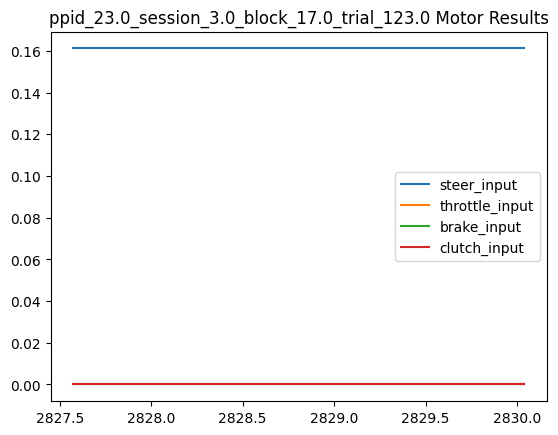

In [10]:
%matplotlib inline
post_processed_event_df, turns_df = process_session_motor(rns_data, post_processed_event_df, motor_channel='Unity_MotorInput',
                                                plot_motor_result = True, plot_motor_snippet = 30, plot_frequency = 10)


,trial_start_time,trial_end_time,ppid,session,block,number_in_block,trial,density,damage,source,...,measures.pnn20,measures.pnn50,measures.hr_mad,measures.sd1,measures.sd2,measures.s,measures.sd1/sd2,measures.breathingrate,measures,turn_type
0,1648.339247,1649.199998,23.0,3.0,3.0,6.0,22.0,0.057953,0.000000,2.0,...,0.833333,0.500000,19.531250,42.839511,81.439513,10960.479264,0.526029,0.256454,NaN,left
1,1648.339247,1655.672679,23.0,3.0,3.0,6.0,22.0,0.057953,0.000000,2.0,...,0.833333,0.500000,19.531250,42.839511,81.439513,10960.479264,0.526029,0.256454,NaN,left
2,1648.339247,1652.283013,23.0,3.0,3.0,6.0,22.0,0.057953,0.000000,2.0,...,0.833333,0.500000,19.531250,42.839511,81.439513,10960.479264,0.526029,0.256454,NaN,right
3,1648.339247,1658.467690,23.0,3.0,3.0,6.0,22.0,0.057953,0.000000,2.0,...,0.833333,0.500000,19.531250,42.839511,81.439513,10960.479264,0.526029,0.256454,NaN,right
4,1755.060032,1756.815051,23.0,3.0,5.0,3.0,32.0,0.114421,11.328817,1.0,...,0.777778,0.333333,31.005859,25.848919,31.137050,2528.539382,0.830166,0.241400,NaN,left
5,1755.060032,1760.013574,23.0,3.0,5.0,3.0,32.0,0.114421,11.328817,1.0,...,0.777778,0.333333,31.005859,25.848919,31.137050,2528.539382,0.830166,0.241400,NaN,left
6,1755.060032,1758.118858,23.0,3.0,5.0,3.0,32.0,0.114421,11.328817,1.0,...,0.777778,0.333333,31.005859,25.848919,31.137050,2528.539382,0.830166,0.241400,NaN,right
7,1755.060032,1762.611483,23.0,3.0,5.0,3.0,32.0,0.114421,11.328817,1.0,...,0.777778,0.333333,31.005859,25.848919,31.137050,2528.539382,0.830166,0.241400,NaN,right
8,1849.351850,1850.653109,23.0,3.0,6.0,7.0,42.0,0.444326,11.328817,3.0,...,0.571429,0.285714,31.005859,27.140493,46.925420,4001.066571,0.578375,0.284576,NaN,left
9,1849.351850,1856.401075,23.0,3.0,6.0,7.0,42.0,0.444326,11.328817,3.0,...,0.571429,0.285714,31.005859,27.140493,46.925420,4001.066571,0.578375,0.284576,NaN,left


# 5. Save

In [18]:
post_processed_event_df.to_csv(f"../output/ppid_{post_processed_event_df.iloc[0].ppid}_session_{post_processed_event_df.iloc[0].session}.csv")